<a href="https://colab.research.google.com/github/msbonus/swhp/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install iapws

In [0]:
!pip install iapws

Download data files

In [0]:
!wget https://raw.githubusercontent.com/msbonus/swhp/master/SWHP.csv
!wget https://raw.githubusercontent.com/msbonus/swhp/master/Water.csv

all imports

In [0]:
import numpy as np
from iapws import iapws97
import csv
import matplotlib.pyplot as plt

Water properties

In [0]:
pa = 101325/10**6 #MPa
TK0 = 273.15

def WaterCp(Tw):
  return iapws97._Region1(Tw+TK0, pa)["cp"] #kJ/(kg*K)

def WaterDensity(Tw):
  return 1/iapws97._Region1(Tw+TK0, pa)["v"] #kg/m3

load inlet Water parameters

In [0]:
with open ('Water.csv', 'r') as csvFile:
  reader = csv.reader(csvFile, delimiter=';')
  InletWater = np.matrix(list(reader))
csvFile.close()


Definition of Class "Heat Pump"

In [0]:
class HeatPump:
  def __init__(self, Producer, Type, w_flow,
               Tw_in, Tw_out, h_flow, Th_out, Consumption):
    self.Producer = Producer
    self.Type = Type
    self.w_flow = w_flow
    self.Tw_in = Tw_in
    self.Tw_out = Tw_out
    self.h_flow = h_flow
    self.Th_out = Th_out
    self.Consumption = Consumption

  def __str__(self):
    return("Producer\t Type\t\t w_flow\t Tw_in\t Tw_out\t h_flow\t"
           + " Th_out\t Consumption\n"
           + self.Producer + "\t " + self.Type + "\t " + self.w_flow + "\t "
           + self.Tw_in + "\t " + self.Tw_out + "\t " + self.h_flow + "\t "
           + self.Th_out + "\t " + self.Consumption)
  
  def getW_flow(self):
    return float(self.w_flow)
  def getTh_out(self):
    return float(self.Th_out)
  
  def getCOP(self, Tw):
    Tw = max(min(float(self.Tw_in), Tw), float(self.Tw_out))
    #if Tw > float(self.Tw_in) or Tw < float(self.Tw_out):
      #print('Warning: Inlet Temperature is not in the allowed range')
    return (float(self.Th_out) + TK0)/(float(self.Th_out) - Tw)

Definiton of Class "Database"

In [0]:
class HeatPumpDB:
  DB = []
  def __init__(self):
    with open ('SWHP.csv', 'r') as csvFile:
      reader = csv.DictReader (csvFile, delimiter=';')
      self.DB = list(reader)
    csvFile.close()
  
  def getHeatPump_byID(self, ID):
    for entry in self.DB:
      if (int(entry["ID"]) == ID):
        return self.makeHeatPump(entry)
      
  def getHeatPump_byType(self, Type):
    for entry in self.DB:
      if (entry["Type"]) == Type:
        return self.makeHeatPump(entry)

  def makeHeatPump(self, entry):
    return HeatPump(entry["Producer"], entry["Type"], entry["w_flow"],
                    entry["Tw_in"], entry["Tw_out"], entry["h_flow"],
                    entry["Th_out"], entry["Consumption"])


COP

<class '__main__.HeatPump'>
20.0


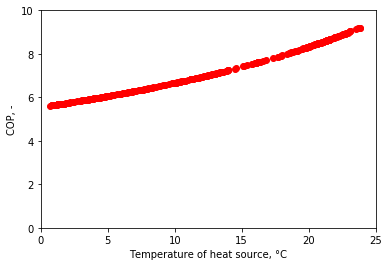

In [0]:
#create an instance of the database
HeatPumpDB1 = HeatPumpDB()

WP1 = HeatPumpDB1.getHeatPump_byID(0)
print(type(WP1))

Tw = InletWater[:,1] 

 #Tw = max(min(float(self.Tw_in), Tw), float(self.Tw_out))
#print (max(min(float(WP1.Tw_in), 11.1), float(WP1.Tw_out)))
  
COP = []
for i in range(len(Tw)):
  COP.append(WP1.getCOP(float(Tw[i])))
  
#plot (x = Temperature of Heat source, y = COP)
x = Tw
y = COP

plt.plot(x, y, "ro")
plt.xlabel('Temperature of heat source, °C')
plt.ylabel('COP, -')
plt.axis([0, 25, 0, 10])
plt.show()

main calculation

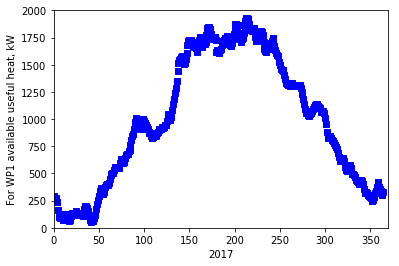

In [0]:
def getHeat(V, Tw, T0=0):
  return V*WaterDensity(Tw)*WaterCp(Tw)*(Tw-T0)/3600 #kW

Qu = []
for i in range(len(Tw)):
  Qu.append(getHeat(WP1.getW_flow(), float(Tw[i])))

x = range(len(Qu))
y = Qu

plt.plot(x, y, "bs")
plt.xlabel('2017')
plt.ylabel('For WP1 available useful heat, kW')
plt.axis([0, 370, 0, 2000])
plt.show()
  



draft

In [0]:
#for row in reader:
    #print(dict(row))
  print(list(reader))

zu COP:
Qout = COP*Qel => Qel = Qout/COP  auch
COP = 1 + in/el
=> COP = 1+ (in*COP)/out
=> COP*out = out + COP*in
=> in = out - out/COP => in = out(1-1/COP)



graph

In [0]:
x = np.arange(9)

plt.plot(x, x, "ro", x, x**2, "g^", x, x**3, "bs")
plt.xlabel('x')
#plt.ylabel('y')
plt.axis([0, 10, -1, 150])
plt.show()

In [0]:

def Qout(self, Qin, COP):
  return (Qin*COP)/(COP - 1)

def h_flow(self, Qout, COP):
  return Qout/(rho*Cp*(Th-Tw)) # Sebastian fragen

def achieved

print ("COP = ", COP, "-")
print ("Qout = ", Qout, "kW")
print ("Heat flow = ", h_flow, "m^3/h")